In [2]:
import pandas as pd

df = pd.read_csv("df_clean.csv")

df.head()

,album_type,track_duration,nombre_artist,track_release_month,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pays_du_producteur,popularity
0,album,30000,1,December,0.3210,0.952,6.0,-16.922,1.0,0.2100,0.7050,0.978,0.3400,0.03230,101.659,4.0,AU,0.0
1,album,30000,1,January,0.2750,0.912,3.0,-23.424,1.0,0.0704,0.9670,0.916,0.1990,0.00000,37.771,4.0,US,35.0
2,album,30000,1,March,0.1760,0.999,2.0,-25.388,1.0,0.0786,0.0677,0.662,0.7620,0.00001,98.109,4.0,ZZ,59.0
3,album,30000,1,December,0.0837,0.208,7.0,-20.947,1.0,0.0422,0.7000,0.880,0.0606,0.06500,168.334,5.0,GB,35.0
4,album,30000,1,December,0.2140,0.236,7.0,-20.772,1.0,0.0448,0.6780,0.878,0.0637,0.03920,79.725,4.0,GB,38.0


In [3]:
df.columns

Index(['album_type', 'track_duration', 'nombre_artist', 'track_release_month',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'pays_du_producteur', 'popularity'],
      dtype='object')

In [4]:
liste_to_keep =[
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'popularity']
df=df[liste_to_keep]

In [5]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,0.3210,0.9520,6.0,-16.922,1.0,0.2100,0.7050,0.978000,0.3400,0.03230,101.659,4.0,0.0
1,0.2750,0.9120,3.0,-23.424,1.0,0.0704,0.9670,0.916000,0.1990,0.00000,37.771,4.0,35.0
2,0.1760,0.9990,2.0,-25.388,1.0,0.0786,0.0677,0.662000,0.7620,0.00001,98.109,4.0,59.0
3,0.0837,0.2080,7.0,-20.947,1.0,0.0422,0.7000,0.880000,0.0606,0.06500,168.334,5.0,35.0
4,0.2140,0.2360,7.0,-20.772,1.0,0.0448,0.6780,0.878000,0.0637,0.03920,79.725,4.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225860,0.6090,0.6610,1.0,-9.156,1.0,0.0918,0.0472,0.006890,0.2550,0.50800,118.161,4.0,22.0
225861,0.4100,0.0387,3.0,-19.903,1.0,0.0409,0.9720,0.000045,0.1150,0.61100,88.363,4.0,28.0
225862,0.1600,0.0589,0.0,-22.548,1.0,0.0348,0.9290,0.910000,0.4960,0.18600,80.008,5.0,7.0
225863,0.4260,0.5220,11.0,-20.293,0.0,0.2730,0.5830,0.000003,0.3110,0.24200,93.894,4.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225865 entries, 0 to 225864
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      225865 non-null  float64
 1   energy            225865 non-null  float64
 2   key               225865 non-null  float64
 3   loudness          225865 non-null  float64
 4   mode              225865 non-null  float64
 5   speechiness       225865 non-null  float64
 6   acousticness      225865 non-null  float64
 7   instrumentalness  225865 non-null  float64
 8   liveness          225865 non-null  float64
 9   valence           225865 non-null  float64
 10  tempo             225865 non-null  float64
 11  time_signature    225865 non-null  float64
 12  popularity        225865 non-null  float64
dtypes: float64(13)
memory usage: 22.4 MB


In [7]:
from sklearn.model_selection import train_test_split

X=df.drop('popularity',axis=1)
y=df['popularity']
X_train,X_test,y_train,y_test = train_test_split(X, y,shuffle=True, test_size=0.2,random_state=42)


In [8]:
numeric_features = list(X.select_dtypes(include=['int', 'float']).columns)

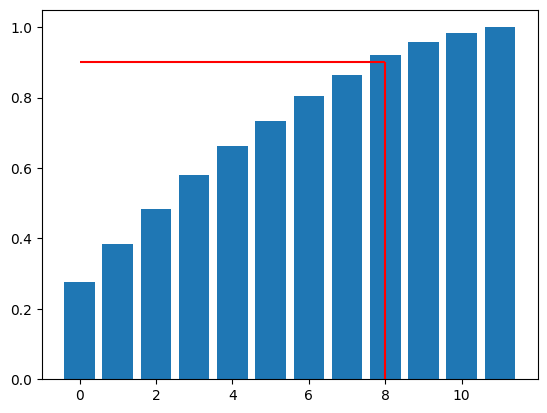

In [9]:
from sklearn.preprocessing import  StandardScaler
import numpy as np
std = StandardScaler()
X_train_standard = std.fit_transform(X_train[numeric_features])

from sklearn.decomposition import PCA
# Choisir le nb de composants
n_dims = X_train_standard.shape[1]
model = PCA(n_components=n_dims)
model.fit(X_train_standard)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)

import matplotlib.pyplot as plt
plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer,PolynomialFeatures
from sklearn.decomposition import PCA

numeric_transformer = Pipeline([
        # ('log', FunctionTransformer(func=np.log1p)),
        ('standard', StandardScaler()),  # Centrer réduire
        ('pca', PCA(n_components=8)),
        # ('polyanomie',PolynomialFeatures()) # après standardisation
        ])



# ############### IV.d Combinaison ##############
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    
    ],
    # remainder="passthrough" 
)

In [11]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
rforest_model = RandomForestRegressor(n_estimators =  700, max_depth = 5,random_state=42)
pipe_rfr = Pipeline([
     ('preprocessor', preprocessor),
     ('decisiontree', rforest_model)
])

In [12]:
import mlflow


mlflow.set_experiment("rfr_trackfeatures_models")
mlflow.sklearn.autolog()
# premier run
with mlflow.start_run(run_name='reg_rfr_trackfeatures'):
  
  pipe_rfr.fit(X_train, y_train)

2023/03/03 10:52:17 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2023/03/03 10:52:17 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standard', StandardScaler()),
                                                 ('pca', PCA(n_components=8))]),
                                 ['danceability', 'energy', 'key', 'loudness',
                                  'mode', 'speechiness', 'acousticness',
                                  'instrumentalness', 'liveness', 'valence',
                                  'tempo', 'time...`


In [13]:
import xgboost as xgb
regressor=xgb.XGBRegressor(decisiontree__n_estimators= 700, decisiontree__max_depth= 5, decisiontree__learning_rate = 0.015, eval_metric='rmsle',random_state=42)

pipe_xgb_regressor = Pipeline([
     ('preprocessor', preprocessor),
     ('decisiontree', regressor)
])

In [14]:
import mlflow


mlflow.set_experiment("XGBr_track_freature_models")
mlflow.sklearn.autolog()
# premier run
with mlflow.start_run(run_name='XGBr_track_freature'):
  
  pipe_xgb_regressor.fit(X_train, y_train)

2023/03/03 10:56:50 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2023/03/03 10:56:50 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standard', StandardScaler()),
                                                 ('pca', PCA(n_components=8))]),
                                 ['danceability', 'energy', 'key', 'loudness',
                                  'mode', 'speechiness', 'acousticness',
                                  'instrumentalness', 'liveness', 'valence',
                                  'tempo', 'time...`
2023/03/03 10:56:50 WARNING mlflow.utils: Truncated the value of the key `decisiontree`. Truncated value: `XGBRegressor(base_score=None, booster=None, callbacks

[10:56:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "decisiontree__learning_rate", "decisiontree__max_depth", "decisiontree__n_estimators" } are not used.



In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
pipe_rfr = Pipeline([
     ('preprocessor', preprocessor),
     ('decisiontree', lr_model)
])